In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import lutorpy as lua

In [2]:
raw = torch.load('/home/chenxi/experiments/torch-playground/exp/face6/log.t7')
data = raw.asNumpyArray()
data_sorted = sorted(data, key=lambda x: x[0])
preds = np.array([x[1] for x in data_sorted]).astype('int32')
pairs = [(0.0, 0.0)]
nPos = np.sum(preds)
nNeg = len(preds) - nPos
fp = 0
tp = 0
for d in preds:
    if d == 1:
        tp += 1
    else:
        fp += 1
    pairs.append((fp, tp))
pairs = np.array(pairs) / np.array([[nNeg, nPos]], dtype='float32')
idx = np.argmin(np.abs(1-pairs[:, 0] - pairs[:, 1]))
print(1- pairs[idx][0])

0.877333333333


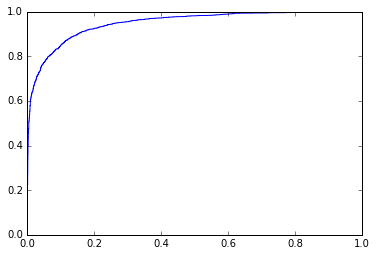

In [3]:
plt.plot(pairs[:, 0], pairs[:, 1])